#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

(0.0, 256.0)

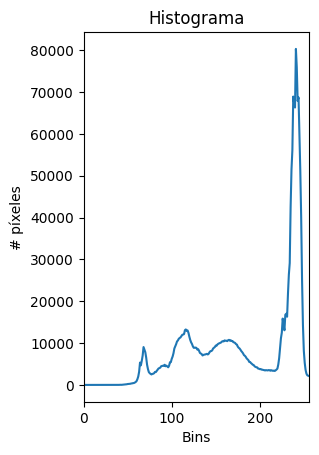

In [2]:
#Carga imagen ejemplo con monedas
img = cv2.imread('monedas.jpeg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

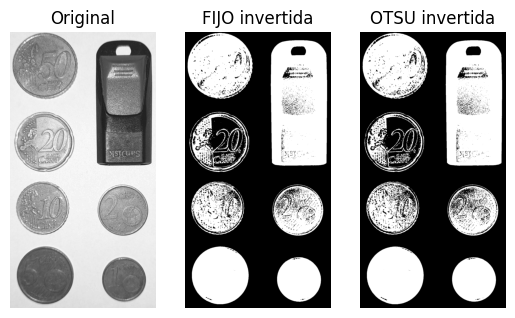

In [3]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 185
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Número total de monedas: 6


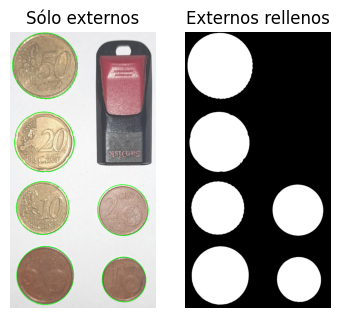

In [4]:
img = cv2.imread('monedas.jpeg') 
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

umbral = 200
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

#Obtiene contornos externos
contornos, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_cont = np.zeros(img_rgb.shape)
filtered_contours = 0

for c in contornos:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Filtramos por area mínima
    if area > 10 :
        perimetro = cv2.arcLength(c,True)
        #Filtramos por perimetro máximo
        if perimetro < 1700:
            #Añadimos al contador
            filtered_contours += 1
            #Dibuja los contornos
            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)
            cv2.drawContours(img_rgb, [c], -1, (0,255,0), 4)

print(f'Número total de monedas: {filtered_contours}')

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


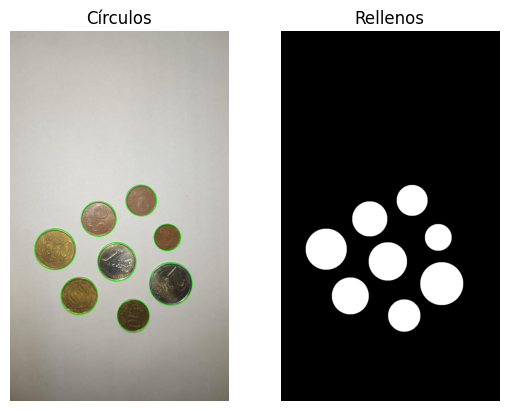

Número total de monedas:  8
Cantidad Total: 3.88 euros


In [5]:
# Cargar la imagen

img = cv2.imread('monedas10.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a escala de grises y suavizado
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pimg = cv2.medianBlur(gris, 7)

# Detección de círculos
circ = cv2.HoughCircles(
    pimg,
    cv2.HOUGH_GRADIENT,
    1,
    100,
    param1=100,
    param2=20,
    minRadius=50,
    maxRadius=120,
)


valores_monedas = {"2_eur": 2, "1_eur": 1,"50_cent": 0.5, "20_cent": 0.2, "10_cent":0.1, "5_cent":0.05,"2_cent":0.02, "1_cent":0.01}

moneda_seleccionada = None
def clic_en_imagen(event, x, y, flags, param):
    global moneda_seleccionada
    if event == cv2.EVENT_LBUTTONDOWN:
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            # Verifica si el clic está dentro del círculo
            if np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2) < det_radio:
                 moneda_seleccionada = det
            #Salimos cuando se selecciona la moneda
        if moneda_seleccionada is not None:
             cv2.destroyAllWindows()

img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Número total de monedas: ", len(circ[0]))

# Crea una ventana para la imagen
cv2.namedWindow('Imagen', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen', 450, 800)


moneda_seleccionada = cv2.setMouseCallback('Imagen', clic_en_imagen)

# Muestra la imagen con círculos
cv2.imshow('Imagen', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()


error=2.53
cantidadTotal = 0.0

for det in circ[0]:
     det_radio_moneda_seleccionada = moneda_seleccionada[2]
     det_radio = det[2]
     if abs(det_radio - ((16.26/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["1_cent"]
     elif abs(det_radio - ((18.75/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["2_cent"]
     elif abs(det_radio - ((21.25/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["5_cent"]
     elif abs(det_radio - ((19.75/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["10_cent"]
     elif abs(det_radio - ((22.25/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["20_cent"]
     elif abs(det_radio - ((24.25/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal +=valores_monedas["50_cent"]
     elif abs(det_radio - det_radio_moneda_seleccionada) <= error:
          cantidadTotal += valores_monedas["1_eur"]
     elif abs(det_radio - ((25.75/2) * det_radio_moneda_seleccionada / (23.25/2))) <= error:
          cantidadTotal += valores_monedas["2_eur"]


print(f"Cantidad Total: {cantidadTotal} euros")
